In [1]:
import os
os.chdir("C:/Users/lukev/Documents/SOPlijner/SOPlijner")
import torch
torch.cuda.is_available()

True

### Load english models for SICK dataset

In [2]:
model_sick_roberta_en = torch.load("sick_nl/model_data/models/model_SICK_roberta-base.pt")
model_sick_mbert_en = torch.load("sick_nl/model_data/models/model_SICK_bert-base-multilingual-cased.pt")
model_sick_bert_en = torch.load("sick_nl/model_data/models/model_SICK_bert-base-cased.pt")

FileNotFoundError: [Errno 2] No such file or directory: 'sick_nl/model_data/models/model_SICK_roberta-base.pt'

### Load dutch models for SICK dataset

In [3]:
model_sick_mbert_nl = torch.load("sick_nl/model_data/models/model_SICK_NL_bert-base-multilingual-cased.pt")
model_sick_bert_nl = torch.load("sick_nl/model_data/models/model_SICK_NL_bert-base-dutch-cased.pt")
model_sick_roberta_nl = torch.load("sick_nl/model_data/models/model_SICK_NL_robbert-v2-dutch-base.pt")

### Load english models for medNLI

In [2]:
model_mednli_roberta_en = torch.load("sick_nl/model_data/models/model_MEDNLI_roberta-base.pt")
model_mednli_mbert_en = torch.load("sick_nl/model_data/models/model_MEDNLI_bert-base-multilingual-cased.pt")
model_mednli_bert_en = torch.load("sick_nl/model_data/models/model_MEDNLI_bert-base-cased.pt")

### Load dutch models for medNLI

In [3]:
model_mednli_bert_nl_go = torch.load("sick_nl/model_data/models/model_MEDNLI_NL_go_bert-base-dutch-cased.pt")
model_mednli_bert_nl_dl = torch.load("sick_nl/model_data/models/model_MEDNLI_NL_dl_bert-base-dutch-cased.pt")
model_mednli_roberta_nl_go = torch.load("sick_nl/model_data/models/model_MEDNLI_NL_go_robbert-v2-dutch-base.pt")
model_mednli_roberta_nl_dl = torch.load("sick_nl/model_data/models/model_MEDNLI_NL_dl_robbert-v2-dutch-base.pt")
model_mednli_mbert_nl_go = torch.load("sick_nl/model_data/models/model_MEDNLI_NL_go_bert-base-multilingual-cased.pt")
model_mednli_mbert_nl_dl = torch.load("sick_nl/model_data/models/model_MEDNLI_NL_dl_bert-base-multilingual-cased.pt")

### Set to evaluation state

In [4]:
print(torch.__version__)

model_sick_mbert_en.eval()
model_sick_mbert_nl.eval()

model_sick_roberta_en.eval()
model_sick_roberta_nl

model_sick_bert_en.eval()
model_sick_bert_nl.eval()


1.11.0+cu113


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30073, 768, padding_idx=3)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [4]:
model_mednli_bert_en.eval()
model_mednli_bert_nl_go.eval()
model_mednli_bert_nl_dl.eval()

model_mednli_roberta_en.eval()
model_mednli_roberta_nl_go.eval()
model_mednli_roberta_nl_dl.eval()

model_mednli_mbert_en.eval()
model_mednli_mbert_nl_go.eval()
model_mednli_mbert_nl_dl.eval()

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(119547, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elemen

### Load datasets and build test sets

In [5]:
from sick_nl.code.models.bert_finetune import BERT_DATASET, BERTFineTuner
from sick_nl.code.loaders.sick import load_sick_en, load_sick_nl
from sick_nl.code.loaders.mednli import load_mednli_en, load_mednli_nl_go, load_mednli_nl_dl
from sick_nl.code.config import (models_folder, results_folder, bert, bert_nl,
                                 roberta, roberta_nl, mbert)
from sick_nl.code.loaders.nli_models import load_bert_nli_model
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import RobertaTokenizer, RobertaForSequenceClassification

#Load datasets
nl_sick = load_sick_nl()
en_sick = load_sick_en()
nl_mednli = load_mednli_nl_dl()
en_mednli = load_mednli_en()

#Init tokenizers
tokenizer_mbert = BertTokenizer.from_pretrained(mbert)
tokenizer_bertnl = BertTokenizer.from_pretrained(bert_nl)
tokenizer_bert = BertTokenizer.from_pretrained(bert)
tokenizer_roberta = RobertaTokenizer.from_pretrained(roberta)
tokenizer_robertanl = RobertaTokenizer.from_pretrained(roberta_nl)

#Init BERT test sets SICK
eval_dataset_sick_bert = BERT_DATASET(en_sick.test_data, tokenizer_bert)
eval_dataset_sick_bert_nl = BERT_DATASET(nl_sick.test_data, tokenizer_bertnl)

eval_dataset_sick_roberta = BERT_DATASET(en_sick.test_data, tokenizer_roberta)
eval_dataset_sick_roberta_nl = BERT_DATASET(nl_sick.test_data, tokenizer_robertanl)

eval_dataset_sick_mbert = BERT_DATASET(en_sick.test_data, tokenizer_mbert)
eval_dataset_sick_mbert_nl = BERT_DATASET(nl_sick.test_data, tokenizer_mbert)

#Init BERT test sets mednli
eval_dataset_mednli_bert = BERT_DATASET(en_mednli.test_data, tokenizer_bert)
eval_dataset_mednli_bert_nl = BERT_DATASET(nl_mednli.test_data, tokenizer_bertnl)

eval_dataset_mednli_roberta = BERT_DATASET(en_mednli.test_data, tokenizer_roberta)
eval_dataset_mednli_roberta_nl = BERT_DATASET(nl_mednli.test_data, tokenizer_robertanl)

eval_dataset_mednli_mbert = BERT_DATASET(en_mednli.test_data, tokenizer_mbert)
eval_dataset_mednli_mbert_nl = BERT_DATASET(nl_mednli.test_data, tokenizer_mbert)

Downloading:   0%|          | 0.00/236k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/254 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/608 [00:00<?, ?B/s]

### Get validation results

In [6]:
import pickle

print("SICK results: \n\n")
with open("sick_nl/model_data/results/results_new_torch_ver/results_SICK_bert-base-cased.p", 'rb') as f:
    results = pickle.load(f)
print(f"Results BERT english for SICK dataset: {results}\n")
with open("sick_nl/model_data/results/results_new_torch_ver/results_SICK_NL_bert-base-dutch-cased.p", 'rb') as f:
    results = pickle.load(f)
print(f"Results BERT dutch for SICK-NL dataset: {results}\n")

with open("sick_nl/model_data/results/results_new_torch_ver/results_SICK_roberta-base.p", 'rb') as f:
    results = pickle.load(f)
print(f"\nResults Roberta (english) for SICK dataset: {results}\n")
with open("sick_nl/model_data/results/results_new_torch_ver/results_SICK_nl_robbert-v2-dutch-base.p", 'rb') as f:
    results = pickle.load(f)
print(f"Results RobBERT (dutch) for SICK-NL dataset: {results}\n")

with open("sick_nl/model_data/results/results_new_torch_ver/results_SICK_bert-base-multilingual-cased.p", 'rb') as f:
    results = pickle.load(f)
print(f"\nResults mbert (english) for SICK dataset: {results}\n")
with open("sick_nl/model_data/results/results_new_torch_ver/results_SICK_nl_bert-base-multilingual-cased.p", 'rb') as f:
    results = pickle.load(f)
print(f"Results mbert (dutch) for SICK-NL dataset: {results}\n")


print("\n\n\nMEDNLI results: \n\n")
with open("sick_nl/model_data/results/results_new_torch_ver/results_MEDNLI_bert-base-cased.p", 'rb') as f:
    results = pickle.load(f)
print(f"\nResults BERT english for MEDNLI dataset: {results}\n")
with open("sick_nl/model_data/results/results_new_torch_ver/results_MEDNLI_NL_go_bert-base-dutch-cased.p", 'rb') as f:
    results = pickle.load(f)
print(f"\nResults BERT dutch translated with Google Translate for MEDNLI dataset: {results}\n")
with open("sick_nl/model_data/results/results_new_torch_ver/results_MEDNLI_NL_dl_bert-base-dutch-cased.p", 'rb') as f:
    results = pickle.load(f)
print(f"\nResults BERT dutch translated with DeepL Translate for MEDNLI dataset: {results}\n")

with open("sick_nl/model_data/results/results_new_torch_ver/results_MEDNLI_roberta-base.p", 'rb') as f:
    results = pickle.load(f)
print(f"\nResults RoBERTa english for MEDNLI dataset: {results}\n")
with open("sick_nl/model_data/results/results_new_torch_ver/results_MEDNLI_NL_go_robbert-v2-dutch-base.p", 'rb') as f:
    results = pickle.load(f)
print(f"\nResults RobBERT dutch translated with Google Translate for MEDNLI dataset: {results}\n")
with open("sick_nl/model_data/results/results_new_torch_ver/results_MEDNLI_NL_dl_robbert-v2-dutch-base.p", 'rb') as f:
    results = pickle.load(f)
print(f"\nResults RobBERT dutch translated with DeepL Translate for MEDNLI dataset: {results}\n")

with open("sick_nl/model_data/results/results_new_torch_ver/results_MEDNLI_bert-base-multilingual-cased.p", 'rb') as f:
    results = pickle.load(f)
print(f"\nResults mBERT english for MEDNLI dataset: {results}\n")
with open("sick_nl/model_data/results/results_new_torch_ver/results_MEDNLI_NL_go_bert-base-multilingual-cased.p", 'rb') as f:
    results = pickle.load(f)
print(f"\nResults mBERT dutch translated with Google Translate for MEDNLI dataset: {results}\n")
with open("sick_nl/model_data/results/results_new_torch_ver/results_MEDNLI_NL_dl_bert-base-multilingual-cased.p", 'rb') as f:
    results = pickle.load(f)
print(f"\nResults mBERT dutch translated with DeepL Translate for MEDNLI dataset: {results}\n")

SICK results: 


Results BERT english for SICK dataset: {'eval_loss': 0.9193987846374512, 'eval_accuracy': 0.8767676767676768, 'eval_f1': 0.8670968294723543, 'eval_precision': 0.8671805819101834, 'eval_recall': 0.868364789772238, 'eval_runtime': 5.1145, 'eval_samples_per_second': 96.783, 'eval_steps_per_second': 2.151, 'epoch': 20.0}

Results BERT dutch for SICK-NL dataset: {'eval_loss': 1.3185232877731323, 'eval_accuracy': 0.8383838383838383, 'eval_f1': 0.8328088484772533, 'eval_precision': 0.8478736611745891, 'eval_recall': 0.820492841494295, 'eval_runtime': 5.2083, 'eval_samples_per_second': 95.04, 'eval_steps_per_second': 2.112, 'epoch': 20.0}


Results Roberta (english) for SICK dataset: {'eval_loss': 0.5911558270454407, 'eval_accuracy': 0.8929292929292929, 'eval_f1': 0.887469255385938, 'eval_precision': 0.8771017871017871, 'eval_recall': 0.8999767378795999, 'eval_runtime': 5.6964, 'eval_samples_per_second': 86.897, 'eval_steps_per_second': 1.931, 'epoch': 20.0}

Results RobBERT (

In [7]:
import pickle

print("SICK results: \n\n")
with open("sick_nl/model_data/results/results_selected_on_loss/results_SICK_bert-base-cased.p", 'rb') as f:
    results = pickle.load(f)
print(f"Results BERT english for SICK dataset: {results}\n")
with open("sick_nl/model_data/results/results_selected_on_loss/results_SICK_NL_bert-base-dutch-cased.p", 'rb') as f:
    results = pickle.load(f)
print(f"Results BERT dutch for SICK-NL dataset: {results}\n")

with open("sick_nl/model_data/results/results_selected_on_loss/results_SICK_roberta-base.p", 'rb') as f:
    results = pickle.load(f)
print(f"\nResults Roberta (english) for SICK dataset: {results}\n")
with open("sick_nl/model_data/results/results_selected_on_loss/results_SICK_nl_robbert-v2-dutch-base.p", 'rb') as f:
    results = pickle.load(f)
print(f"Results RobBERT (dutch) for SICK-NL dataset: {results}\n")

with open("sick_nl/model_data/results/results_selected_on_loss/results_SICK_bert-base-multilingual-cased.p", 'rb') as f:
    results = pickle.load(f)
print(f"\nResults mbert (english) for SICK dataset: {results}\n")
with open("sick_nl/model_data/results/results_selected_on_loss/results_SICK_nl_bert-base-multilingual-cased.p", 'rb') as f:
    results = pickle.load(f)
print(f"Results mbert (dutch) for SICK-NL dataset: {results}\n")


print("\n\n\nMEDNLI results: \n\n")
with open("sick_nl/model_data/results/results_selected_on_loss/results_MEDNLI_bert-base-cased.p", 'rb') as f:
    results = pickle.load(f)
print(f"\nResults BERT english for MEDNLI dataset: {results}\n")
with open("sick_nl/model_data/results/results_selected_on_loss/results_MEDNLI_NL_go_bert-base-dutch-cased.p", 'rb') as f:
    results = pickle.load(f)
print(f"\nResults BERT dutch translated with Google Translate for MEDNLI dataset: {results}\n")
with open("sick_nl/model_data/results/results_selected_on_loss/results_MEDNLI_NL_dl_bert-base-dutch-cased.p", 'rb') as f:
    results = pickle.load(f)
print(f"\nResults BERT dutch translated with DeepL Translate for MEDNLI dataset: {results}\n")

with open("sick_nl/model_data/results/results_selected_on_loss/results_MEDNLI_roberta-base.p", 'rb') as f:
    results = pickle.load(f)
print(f"\nResults RoBERTa english for MEDNLI dataset: {results}\n")
with open("sick_nl/model_data/results/results_selected_on_loss/results_MEDNLI_NL_go_robbert-v2-dutch-base.p", 'rb') as f:
    results = pickle.load(f)
print(f"\nResults RobBERT dutch translated with Google Translate for MEDNLI dataset: {results}\n")
with open("sick_nl/model_data/results/results_selected_on_loss/results_MEDNLI_NL_dl_robbert-v2-dutch-base.p", 'rb') as f:
    results = pickle.load(f)
print(f"\nResults RobBERT dutch translated with DeepL Translate for MEDNLI dataset: {results}\n")

with open("sick_nl/model_data/results/results_selected_on_loss/results_MEDNLI_bert-base-multilingual-cased.p", 'rb') as f:
    results = pickle.load(f)
print(f"\nResults mBERT english for MEDNLI dataset: {results}\n")
with open("sick_nl/model_data/results/results_selected_on_loss/results_MEDNLI_NL_go_bert-base-multilingual-cased.p", 'rb') as f:
    results = pickle.load(f)
print(f"\nResults mBERT dutch translated with Google Translate for MEDNLI dataset: {results}\n")
with open("sick_nl/model_data/results/results_selected_on_loss/results_MEDNLI_NL_dl_bert-base-multilingual-cased.p", 'rb') as f:
    results = pickle.load(f)
print(f"\nResults mBERT dutch translated with DeepL Translate for MEDNLI dataset: {results}\n")

SICK results: 


Results BERT english for SICK dataset: {'eval_loss': 0.568435549736023, 'eval_accuracy': 0.8282828282828283, 'eval_f1': 0.8278368377431278, 'eval_precision': 0.8155173991654733, 'eval_recall': 0.8481313016424039, 'eval_runtime': 5.1434, 'eval_samples_per_second': 96.24, 'eval_steps_per_second': 2.139, 'epoch': 10.0}

Results BERT dutch for SICK-NL dataset: {'eval_loss': 0.8265621662139893, 'eval_accuracy': 0.8080808080808081, 'eval_f1': 0.8048251215522844, 'eval_precision': 0.8116421286711142, 'eval_recall': 0.8014801765490954, 'eval_runtime': 5.2, 'eval_samples_per_second': 95.192, 'eval_steps_per_second': 2.115, 'epoch': 10.0}


Results Roberta (english) for SICK dataset: {'eval_loss': 0.4322756826877594, 'eval_accuracy': 0.8787878787878788, 'eval_f1': 0.8776171181098599, 'eval_precision': 0.8659536541889482, 'eval_recall': 0.8940368938865255, 'eval_runtime': 5.7419, 'eval_samples_per_second': 86.208, 'eval_steps_per_second': 1.916, 'epoch': 10.0}

Results RobBERT (d

### Function to make predictions
set print_individual to True if you want to print the predictions for each sentence

In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import numpy as np
import matplotlib.pyplot as plt

def make_predictions(bert_data, sentences, model, tokenizer, name, print_individual):
    evaluating = True
    tuner = BERTFineTuner(name, tokenizer, model, [], bert_data,"", evaluating)
    premises = [i[0] for i in sentences] 
    hypothesis = [i[1] for i in sentences] 
    model.eval()
    predictions = tuner.evaluate()
    labels = ["Contradiction", "Neutral", "Entailment"]
    predictions["eval_trues"] = [labels[i] for i in predictions["eval_trues"]]
    predictions["eval_predictions"] = [labels[i] for i in predictions["eval_predictions"]]
    conf_matrix = confusion_matrix(predictions["eval_trues"], predictions["eval_predictions"], labels=labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)
    disp.plot()
    plt.show()
    results = zip(predictions["eval_trues"], predictions["eval_predictions"], premises, hypothesis, predictions['eval_probabilities'])
    print(f"\nTotal scores: \neval_loss: {predictions['eval_loss']} \t eval_accuracy: {predictions['eval_accuracy']} \t eval_f1: {predictions['eval_f1']} \t eval_precision: {predictions['eval_precision']} \t eval_recall: {predictions['eval_recall']}\n")
    print(conf_matrix)
    if print_individual:
        print("\nIndividual predictions: \n")
        for (i, (ground_truth, prediction, premise, hypothesis, probabilities)) in enumerate(results):
            print(ground_truth, prediction, premise, hypothesis, probabilities)
            print(f"Premise: {premise} \nHypothesis: {hypothesis}\nPrediction: {labels[prediction]}\nGround truth: {labels[ground_truth]}\nProbabilities: Contradiction: {probabilities[0]}\tNeutral: {probabilities[1]}\tEntailment: {probabilities[2]}\n\n")



### Make actual predictions on test set

***** Running Evaluation *****
  Num examples = 4906
  Batch size = 8


True


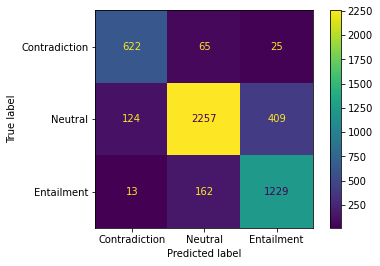

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
***** Running Evaluation *****
  Num examples = 4906
  Batch size = 8



Total scores: 
eval_loss: 0.558751106262207 	 eval_accuracy: 0.8373420301671423 	 eval_f1: 0.834338229285487 	 eval_precision: 0.8223801116665418 	 eval_recall: 0.8526374014836019

[[ 622   65   25]
 [ 124 2257  409]
 [  13  162 1229]]


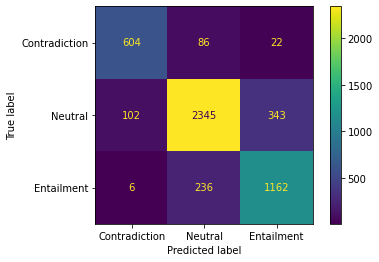

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
***** Running Evaluation *****
  Num examples = 4906
  Batch size = 8



Total scores: 
eval_loss: 0.755178689956665 	 eval_accuracy: 0.8379535262943335 	 eval_f1: 0.8335548783452441 	 eval_precision: 0.8295163064330873 	 eval_recall: 0.8388172421638652

[[ 604   86   22]
 [ 102 2345  343]
 [   6  236 1162]]


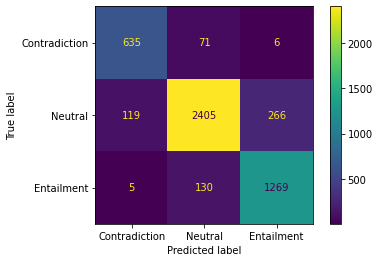

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
***** Running Evaluation *****
  Num examples = 4906
  Batch size = 8



Total scores: 
eval_loss: 0.4435070753097534 	 eval_accuracy: 0.8783122706889523 	 eval_f1: 0.8721863193114986 	 eval_precision: 0.8609962265797174 	 eval_recall: 0.8859024182964016

[[ 635   71    6]
 [ 119 2405  266]
 [   5  130 1269]]


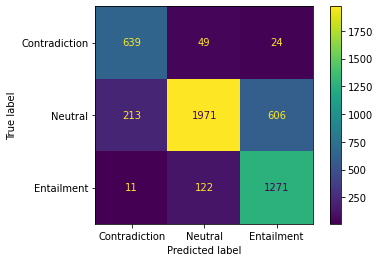

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
***** Running Evaluation *****
  Num examples = 4906
  Batch size = 8



Total scores: 
eval_loss: 0.7199907302856445 	 eval_accuracy: 0.7910721565430086 	 eval_f1: 0.7932787715393146 	 eval_precision: 0.776401289247238 	 eval_recall: 0.8363980594287469

[[ 639   49   24]
 [ 213 1971  606]
 [  11  122 1271]]


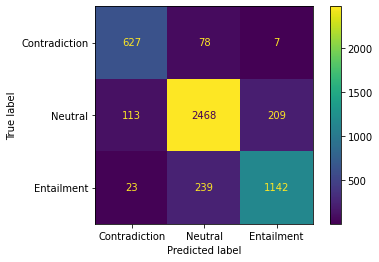

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
***** Running Evaluation *****
  Num examples = 4906
  Batch size = 8



Total scores: 
eval_loss: 0.5264526605606079 	 eval_accuracy: 0.8636363636363636 	 eval_f1: 0.8541625532056817 	 eval_precision: 0.849624910189123 	 eval_recall: 0.8595320348461583

[[ 627   78    7]
 [ 113 2468  209]
 [  23  239 1142]]


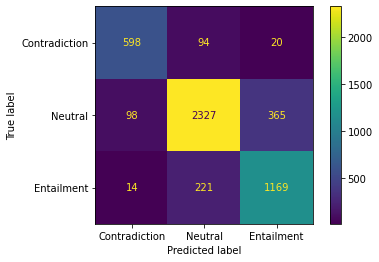


Total scores: 
eval_loss: 0.5626264214515686 	 eval_accuracy: 0.8344883815735834 	 eval_f1: 0.8294141679455292 	 eval_precision: 0.8250926385651466 	 eval_recall: 0.8355196340939967

[[ 598   94   20]
 [  98 2327  365]
 [  14  221 1169]]


In [7]:
sick_nl_data = nl_sick.test_data
sick_en_data = en_sick.test_data
print_individual = False
print(torch.cuda.is_available())

make_predictions(eval_dataset_sick_bert, sick_en_data, model_sick_bert_en, tokenizer_bert, bert, print_individual)
make_predictions(eval_dataset_sick_bert_nl, sick_nl_data, model_sick_bert_nl, tokenizer_bertnl, bert_nl, print_individual)

make_predictions(eval_dataset_sick_roberta, sick_en_data, model_sick_roberta_en, tokenizer_roberta, roberta, print_individual)
make_predictions(eval_dataset_sick_roberta_nl, sick_nl_data, model_sick_roberta_nl, tokenizer_robertanl, roberta_nl, print_individual)

make_predictions(eval_dataset_sick_mbert, sick_en_data, model_sick_mbert_en, tokenizer_mbert, mbert, print_individual)
make_predictions(eval_dataset_sick_mbert_nl, sick_nl_data, model_sick_mbert_nl, tokenizer_mbert, mbert, print_individual)



PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
***** Running Evaluation *****
  Num examples = 1416
  Batch size = 8


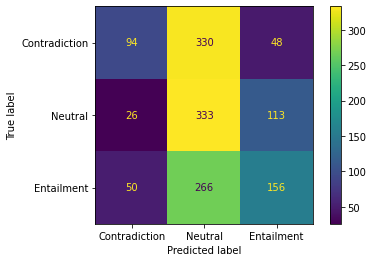


Total scores: 
eval_loss: 1.767464518547058 	 eval_accuracy: 0.4117231638418079 	 eval_f1: 0.38788229521906453 	 eval_precision: 0.4678348957726816 	 eval_recall: 0.41172316384180796

[[ 94 330  48]
 [ 26 333 113]
 [ 50 266 156]]


In [8]:
mednli_data = nl_mednli.test_data
mednli_en_data = en_mednli.test_data

make_predictions(eval_dataset_mednli_roberta_nl, mednli_data, model_sick_roberta_nl, tokenizer_robertanl, roberta_nl, print_individual)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
***** Running Evaluation *****
  Num examples = 1419
  Batch size = 8


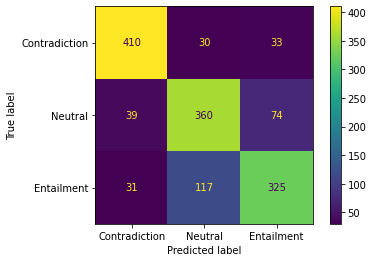

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
***** Running Evaluation *****
  Num examples = 1416
  Batch size = 8



Total scores: 
eval_loss: 0.6209172606468201 	 eval_accuracy: 0.7716701902748414 	 eval_f1: 0.771122211762039 	 eval_precision: 0.7721802176930382 	 eval_recall: 0.7716701902748415

[[410  30  33]
 [ 39 360  74]
 [ 31 117 325]]


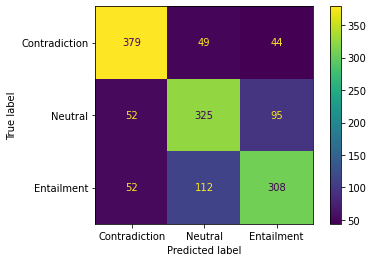

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
***** Running Evaluation *****
  Num examples = 1416
  Batch size = 8



Total scores: 
eval_loss: 0.8259989619255066 	 eval_accuracy: 0.7146892655367232 	 eval_f1: 0.7141693145229988 	 eval_precision: 0.7141471333940722 	 eval_recall: 0.7146892655367232

[[379  49  44]
 [ 52 325  95]
 [ 52 112 308]]


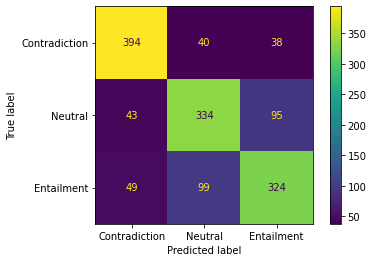

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
***** Running Evaluation *****
  Num examples = 1419
  Batch size = 8



Total scores: 
eval_loss: 0.7261748909950256 	 eval_accuracy: 0.7429378531073446 	 eval_f1: 0.7423164997764634 	 eval_precision: 0.7419340734373238 	 eval_recall: 0.7429378531073446

[[394  40  38]
 [ 43 334  95]
 [ 49  99 324]]


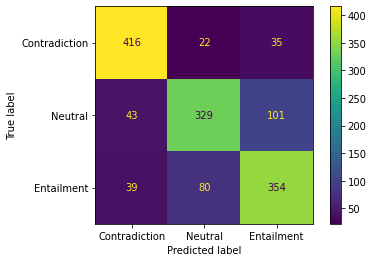

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
***** Running Evaluation *****
  Num examples = 1416
  Batch size = 8



Total scores: 
eval_loss: 0.5895498991012573 	 eval_accuracy: 0.7744890768146582 	 eval_f1: 0.7733090693624233 	 eval_precision: 0.773710470779689 	 eval_recall: 0.7744890768146582

[[416  22  35]
 [ 43 329 101]
 [ 39  80 354]]


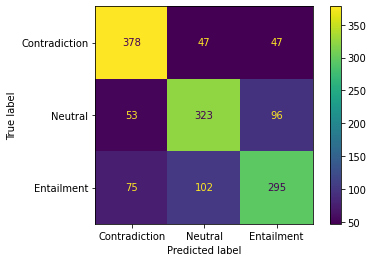

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
***** Running Evaluation *****
  Num examples = 1416
  Batch size = 8



Total scores: 
eval_loss: 0.7520893216133118 	 eval_accuracy: 0.7033898305084746 	 eval_f1: 0.7018932724064261 	 eval_precision: 0.7016245295853315 	 eval_recall: 0.7033898305084746

[[378  47  47]
 [ 53 323  96]
 [ 75 102 295]]


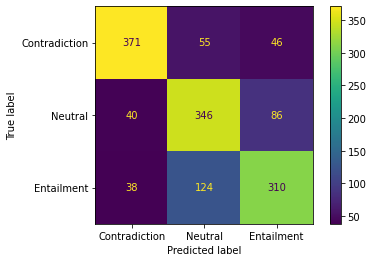

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
***** Running Evaluation *****
  Num examples = 1419
  Batch size = 8



Total scores: 
eval_loss: 0.7035207152366638 	 eval_accuracy: 0.7252824858757062 	 eval_f1: 0.7260217546543205 	 eval_precision: 0.7288952362396618 	 eval_recall: 0.7252824858757062

[[371  55  46]
 [ 40 346  86]
 [ 38 124 310]]


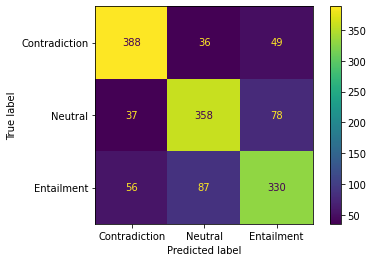

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
***** Running Evaluation *****
  Num examples = 1416
  Batch size = 8



Total scores: 
eval_loss: 0.685218334197998 	 eval_accuracy: 0.7582804792107117 	 eval_f1: 0.7578729063817317 	 eval_precision: 0.7576787357968978 	 eval_recall: 0.7582804792107117

[[388  36  49]
 [ 37 358  78]
 [ 56  87 330]]


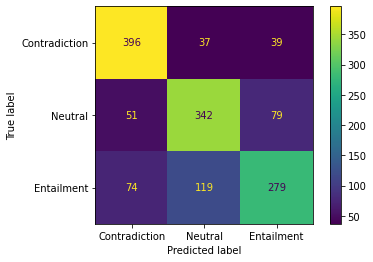

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
***** Running Evaluation *****
  Num examples = 1416
  Batch size = 8



Total scores: 
eval_loss: 0.7256693243980408 	 eval_accuracy: 0.7182203389830508 	 eval_f1: 0.7149516990136152 	 eval_precision: 0.7165315147466974 	 eval_recall: 0.7182203389830509

[[396  37  39]
 [ 51 342  79]
 [ 74 119 279]]


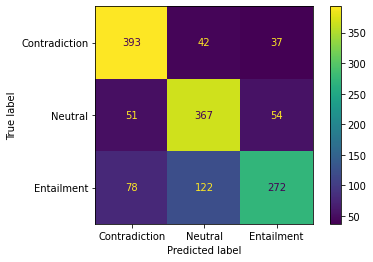


Total scores: 
eval_loss: 0.6980198621749878 	 eval_accuracy: 0.7288135593220338 	 eval_f1: 0.7246820196767016 	 eval_precision: 0.7311112112929233 	 eval_recall: 0.7288135593220341

[[393  42  37]
 [ 51 367  54]
 [ 78 122 272]]


In [12]:
mednli_data = nl_mednli.test_data
mednli_en_data = en_mednli.test_data
print_individual = False

make_predictions(eval_dataset_mednli_bert, mednli_en_data, model_mednli_bert_en, tokenizer_bert, bert, print_individual)
make_predictions(eval_dataset_mednli_bert_nl, mednli_data, model_mednli_bert_nl_go, tokenizer_bertnl, bert_nl, print_individual)
make_predictions(eval_dataset_mednli_bert_nl, mednli_data, model_mednli_bert_nl_dl, tokenizer_bertnl, bert_nl, print_individual)

make_predictions(eval_dataset_mednli_roberta, mednli_en_data, model_mednli_roberta_en, tokenizer_roberta, roberta, print_individual)
make_predictions(eval_dataset_mednli_roberta_nl, mednli_data, model_mednli_roberta_nl_go, tokenizer_robertanl, roberta_nl, print_individual)
make_predictions(eval_dataset_mednli_roberta_nl, mednli_data, model_mednli_roberta_nl_dl, tokenizer_robertanl, roberta_nl, print_individual)

make_predictions(eval_dataset_mednli_mbert, mednli_en_data, model_mednli_mbert_en, tokenizer_mbert, mbert, print_individual)
make_predictions(eval_dataset_mednli_mbert_nl, mednli_data, model_mednli_mbert_nl_go, tokenizer_mbert, mbert, print_individual)
make_predictions(eval_dataset_mednli_mbert_nl, mednli_data, model_mednli_mbert_nl_dl, tokenizer_mbert, mbert, print_individual)


PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
***** Running Evaluation *****
  Num examples = 4906
  Batch size = 8


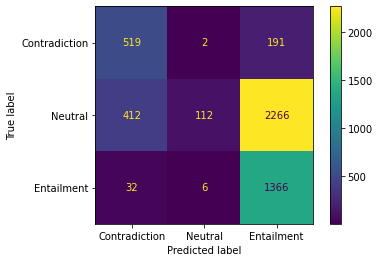


Total scores: 
eval_loss: 1.5468498468399048 	 eval_accuracy: 0.40705258866693844 	 eval_f1: 0.40644939519784123 	 eval_precision: 0.6098617185320635 	 eval_recall: 0.5806701421265877

[[ 519    2  191]
 [ 412  112 2266]
 [  32    6 1366]]

Individual predictions: 

Neutral Entailment Er is geen jongen die buiten speelt en er is geen man die lacht Een groepje kinderen speelt in een tuin en een oude man staat op de achtergrond [0.13898833096027374, 0.10195180773735046, 0.7590598464012146]


TypeError: list indices must be integers or slices, not str

In [16]:
sick_nl_data = nl_sick.test_data
sick_en_data = en_sick.test_data

make_predictions(eval_dataset_sick_roberta_nl, sick_nl_data, model_mednli_roberta_nl_go, tokenizer_robertanl, roberta_nl, True)

### Small dataset to test on SOPs and Richtlijnen sentence pairs

In [7]:
sop_richtlijn_dataset = [("Verpleeg een MRSA-positieve patiënt in strikte isolatie", "De patiënt gaat in strikte isolatie, wordt volledig gescreend op MRSA en op de kamerdeur komt een rode isolatiekaart te hangen", "ENTAILMENT", 0),
                        ("Voor linnengoed hoeven geen bijzondere maatregelen te worden genomen", "Was en linnengoed afvoeren op de gebruikelijke manier", "ENTAILMENT", 0),
                        ("Voor het betreden van de kamer worden handschoenen aangedaan, beschermende kleding met lange mouwen aangedaan en voor het betreden van de kamer wordt een mondneusmasker voorgedaan", "Draag pbm: isolatiejas, handschoenen, muts, ffp2 mondneusmasker, eventueel een veiligheidsbril", "ENTAILMENT", 0),
                        ("De ontvangende afdeling neemt dezelfde maatregelen als hier beschreven", "De ontvangende afdeling neemt dezelfde maatregelen als de afdeling waar de patiënt vandaan komt (m.u.v. MRSA naar polikliniek/functie-/onderzoeksafdeling, zie contact isolatie)", "ENTAILMENT", 0),
                        ("Verpleeg een MRSA-positieve patiënt in strikte isolatie", "De MRSA patiënt hoeft niet in isolatie", "CONTRADICTION", 0)]

eval_dataset_roberta = BERT_DATASET(sop_richtlijn_dataset, tokenizer_robertanl)
eval_dataset_mbert = BERT_DATASET(sop_richtlijn_dataset, tokenizer_mbert)
eval_dataset_bertnl = BERT_DATASET(sop_richtlijn_dataset, tokenizer_bertnl)
print_individual = True

In [10]:
#NLI
model_mednli_roberta_nl_dl = torch.load("sick_nl/model_data/models/model_MEDNLI_NL_dl_robbert-v2-dutch-base.pt")
model_mednli_roberta_nl_dl.eval()
#------------------------------------#

#Load dataset
nl_mednli = load_mednli_nl_dl()
eval_dataset_roberta = BERT_DATASET(sop_richtlijn_dataset, tokenizer_robertanl)
tokenizer_robertanl = RobertaTokenizer.from_pretrained(roberta_nl)
tuner = BERTFineTuner(roberta_nl, tokenizer_robertanl, model_mednli_roberta_nl_dl, [], [],"", True)
results = tuner.predict(eval_dataset_roberta)
print(results)

loading file https://huggingface.co/pdelobelle/robbert-v2-dutch-base/resolve/main/vocab.json from cache at C:\Users\lukev/.cache\huggingface\transformers\e338cb20bd645675d888a6469d1b7bfe472e69a5c93052006528c9ae4f856e44.43004df1e5c2251acdd15f077a74063dea7f0082e895ca8978bc6876d97c918b
loading file https://huggingface.co/pdelobelle/robbert-v2-dutch-base/resolve/main/merges.txt from cache at C:\Users\lukev/.cache\huggingface\transformers\0cc0d13f8f47c5f67868f6ea3638b66b788e833af7323164ba7d3e1c92f49f42.15e46d82fe3fef52038bdadabeb8cca392378e0966fa780352e52eaa8301f2ba
loading file https://huggingface.co/pdelobelle/robbert-v2-dutch-base/resolve/main/added_tokens.json from cache at None
loading file https://huggingface.co/pdelobelle/robbert-v2-dutch-base/resolve/main/special_tokens_map.json from cache at C:\Users\lukev/.cache\huggingface\transformers\fc901152bccc6123aa5ca59de0c36b6e68e0796b4d7875a0e4e9744aab712cd2.a11ebb04664c067c8fe5ef8f8068b0f721263414a26058692f7b2e4ba2a1b342
loading file htt

PredictionOutput(predictions=array([[-0.8052241 , -1.0198773 ,  1.772705  ],
       [ 1.2582885 , -0.5927331 , -0.4579755 ],
       [-0.6631475 , -1.1157337 ,  1.3509773 ],
       [ 0.32338685, -1.965223  ,  1.5808353 ],
       [ 2.3239458 , -1.247131  , -0.6625853 ]], dtype=float32), label_ids=array([2, 2, 2, 2, 0], dtype=int64), metrics={'test_loss': 0.5361410975456238, 'test_accuracy': 0.8, 'test_f1': 0.7619047619047619, 'test_precision': 0.75, 'test_recall': 0.875, 'test_trues': [2, 2, 2, 2, 0], 'test_predictions': [2, 0, 2, 2, 0], 'test_probabilities': [[0.06677056849002838, 0.053871918469667435, 0.8793575167655945], [0.7480477094650269, 0.11750081181526184, 0.13445140421390533], [0.10952727496623993, 0.06965728849172592, 0.8208155035972595], [0.21655121445655823, 0.021959878504276276, 0.7614888548851013], [0.9271385073661804, 0.026076283305883408, 0.04678542912006378]], 'test_runtime': 4.0773, 'test_samples_per_second': 1.226, 'test_steps_per_second': 0.245})


In [12]:
make_predictions(eval_dataset_bertnl, sop_richtlijn_dataset, model_sick_bert_nl, tokenizer_bertnl, bert_nl, print_individual)
make_predictions(eval_dataset_mbert, sop_richtlijn_dataset, model_sick_mbert_nl, tokenizer_mbert, mbert, print_individual)
make_predictions(eval_dataset_roberta, sop_richtlijn_dataset, model_sick_roberta_nl, tokenizer_robertanl, roberta_nl, print_individual)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
***** Running Evaluation *****
  Num examples = 5
  Batch size = 8


C:\Users\lukev\anaconda3\envs\both\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
***** Running Evaluation *****
  Num examples = 5
  Batch size = 8



Total scores: 
eval_loss: 1.7169790267944336 	 eval_accuracy: 0.6 	 eval_f1: 0.5555555555555555 	 eval_precision: 0.6666666666666666 	 eval_recall: 0.5

[[1 0 0]
 [0 0 0]
 [0 2 2]]

Individual predictions: 

Premise: Verpleeg een MRSA-positieve patiënt in strikte isolatie 
Hypothesis: De patiënt gaat in strikte isolatie, wordt volledig gescreend op MRSA en op de kamerdeur komt een rode isolatiekaart te hangen
Prediction: Entailment
Ground truth: Entailment
Probabilities: Contradiction: 0.051357023417949677	Neutral: 0.4133988618850708	Entailment: 0.5352442264556885


Premise: Voor linnengoed hoeven geen bijzondere maatregelen te worden genomen 
Hypothesis: Was en linnengoed afvoeren op de gebruikelijke manier
Prediction: Neutral
Ground truth: Entailment
Probabilities: Contradiction: 0.1302768439054489	Neutral: 0.8572274446487427	Entailment: 0.012495875358581543


Premise: Voor het betreden van de kamer worden handschoenen aangedaan, beschermende kleding met lange mouwen aangedaan en vo

C:\Users\lukev\anaconda3\envs\both\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
***** Running Evaluation *****
  Num examples = 5
  Batch size = 8



Total scores: 
eval_loss: 1.9186599254608154 	 eval_accuracy: 0.4 	 eval_f1: 0.35555555555555557 	 eval_precision: 0.5 	 eval_recall: 0.4166666666666667

[[1 0 0]
 [0 0 0]
 [1 2 1]]

Individual predictions: 

Premise: Verpleeg een MRSA-positieve patiënt in strikte isolatie 
Hypothesis: De patiënt gaat in strikte isolatie, wordt volledig gescreend op MRSA en op de kamerdeur komt een rode isolatiekaart te hangen
Prediction: Neutral
Ground truth: Entailment
Probabilities: Contradiction: 0.0012593360152095556	Neutral: 0.9469106197357178	Entailment: 0.051830220967531204


Premise: Voor linnengoed hoeven geen bijzondere maatregelen te worden genomen 
Hypothesis: Was en linnengoed afvoeren op de gebruikelijke manier
Prediction: Contradiction
Ground truth: Entailment
Probabilities: Contradiction: 0.5152338147163391	Neutral: 0.4771210849285126	Entailment: 0.007645039819180965


Premise: Voor het betreden van de kamer worden handschoenen aangedaan, beschermende kleding met lange mouwen aangedaa


Total scores: 
eval_loss: 1.9550294876098633 	 eval_accuracy: 0.6 	 eval_f1: 0.5555555555555555 	 eval_precision: 0.6666666666666666 	 eval_recall: 0.5

[[1 0 0]
 [0 0 0]
 [0 2 2]]

Individual predictions: 

Premise: Verpleeg een MRSA-positieve patiënt in strikte isolatie 
Hypothesis: De patiënt gaat in strikte isolatie, wordt volledig gescreend op MRSA en op de kamerdeur komt een rode isolatiekaart te hangen
Prediction: Neutral
Ground truth: Entailment
Probabilities: Contradiction: 0.006195418071001768	Neutral: 0.9737169146537781	Entailment: 0.020087651908397675


Premise: Voor linnengoed hoeven geen bijzondere maatregelen te worden genomen 
Hypothesis: Was en linnengoed afvoeren op de gebruikelijke manier
Prediction: Neutral
Ground truth: Entailment
Probabilities: Contradiction: 0.44164133071899414	Neutral: 0.5540837645530701	Entailment: 0.004274901933968067


Premise: Voor het betreden van de kamer worden handschoenen aangedaan, beschermende kleding met lange mouwen aangedaan en vo

C:\Users\lukev\anaconda3\envs\both\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [10]:
import warnings
warnings.filterwarnings(action='ignore')

make_predictions(eval_dataset_roberta, sop_richtlijn_dataset, model_mednli_roberta_nl_go, tokenizer_robertanl, roberta_nl, print_individual)
make_predictions(eval_dataset_roberta, sop_richtlijn_dataset, model_mednli_roberta_nl_dl, tokenizer_robertanl, roberta_nl, print_individual)
make_predictions(eval_dataset_bertnl, sop_richtlijn_dataset, model_mednli_bert_nl_go, tokenizer_bertnl, bert_nl, print_individual)
make_predictions(eval_dataset_bertnl, sop_richtlijn_dataset, model_mednli_bert_nl_dl, tokenizer_bertnl, bert_nl, print_individual)
make_predictions(eval_dataset_mbert, sop_richtlijn_dataset, model_mednli_mbert_nl_go, tokenizer_mbert, mbert, print_individual)
make_predictions(eval_dataset_mbert, sop_richtlijn_dataset, model_mednli_mbert_nl_dl, tokenizer_mbert, mbert, print_individual)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
***** Running Evaluation *****
  Num examples = 5
  Batch size = 8



Total scores: 
eval_loss: 0.813625693321228 	 eval_accuracy: 0.6 	 eval_f1: 0.5833333333333333 	 eval_precision: 0.6666666666666666 	 eval_recall: 0.75

[[1 0 0]
 [0 0 0]
 [2 0 2]]

Individual predictions: 



TypeError: list indices must be integers or slices, not str

In [ ]:
#print(eval_dataset_bertnl[0])
input_ids = torch.tensor([i['input_ids'] for i in eval_dataset_bertnl]).to('cuda:0')
attn_masks = torch.tensor([i['attention_mask'] for i in eval_dataset_bertnl]).to('cuda:0')
token_type_ids = torch.tensor([i['token_type_ids'] for i in eval_dataset_bertnl]).to('cuda:0')
#model_sick_bert_nl.cuda()
output = model_mednli_bert_nl_dl(input_ids, attn_masks, token_type_ids)



In [ ]:
import scipy
logits = output.logits
print(output)
print(logits)
probs = scipy.special.softmax(logits.cpu().detach().numpy(), axis=1).tolist()
print(probs)

In [ ]:
import sys

import numpy as np
import torch.nn as nn


def enable_dropout(model):
    """ Function to enable the dropout layers during test-time """
    for m in model.modules():
        if m.__class__.__name__.startswith('Dropout'):
            m.train()

def get_monte_carlo_predictions(data_loader,
                                forward_passes,
                                model,
                                n_classes,
                                n_samples):
    """ Function to get the monte-carlo samples and uncertainty estimates
    through multiple forward passes

    Parameters
    ----------
    data_loader : object
        data loader object from the data loader module
    forward_passes : int
        number of monte-carlo samples/forward passes
    model : object
        keras model
    n_classes : int
        number of classes in the dataset
    n_samples : int
        number of samples in the test set
    """

    dropout_predictions = np.empty((0, n_samples, n_classes))
    softmax = nn.Softmax(dim=1)
    for i in range(forward_passes):
        predictions = np.empty((0, n_classes))
        model.eval()
        enable_dropout(model)
        for i, (image, label) in enumerate(data_loader):

            image = image.to(torch.device('cuda'))
            with torch.no_grad():
                output = model(image)
                output = softmax(output) # shape (n_samples, n_classes)
            predictions = np.vstack((predictions, output.cpu().numpy()))

        dropout_predictions = np.vstack((dropout_predictions,
                                         predictions[np.newaxis, :, :]))
        # dropout predictions - shape (forward_passes, n_samples, n_classes)
    
    # Calculating mean across multiple MCD forward passes 
    mean = np.mean(dropout_predictions, axis=0) # shape (n_samples, n_classes)
    print(f"mean: {mean}")
    # Calculating variance across multiple MCD forward passes 
    variance = np.var(dropout_predictions, axis=0) # shape (n_samples, n_classes)
    print(f"variance: {variance}")
    epsilon = sys.float_info.min
    # Calculating entropy across multiple MCD forward passes 
    entropy = -np.sum(mean*np.log(mean + epsilon), axis=-1) # shape (n_samples,)

    # Calculating mutual information across multiple MCD forward passes 
    mutual_info = entropy - np.mean(np.sum(-dropout_predictions*np.log(dropout_predictions + epsilon),
                                            axis=-1), axis=0) # shape (n_samples,)

In [ ]:
from torch.utils.data import DataLoader
print(eval_dataset_mednli_bert[:1])
test_dataloader = DataLoader(eval_dataset_mednli_bert[:500], batch_size=16, shuffle=False)
get_monte_carlo_predictions(test_dataloader, 100, model_mednli_bert_en, 3, len(test_dataloader))